In [2]:
from IPython.display import clear_output
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, roc_curve, auc, plot_roc_curve, roc_auc_score, classification_report
from sklearn.utils import resample
import numpy as np

In [2]:
#load train file
file_train = 'D:\Downloads\AI in Genomics - District 3\project\code\phyla_all_4514x1177_PMI_threshold_0_clr_85p.csv'
df_train = pd.read_csv(file_train)

In [3]:
df_train

,Unnamed: 0,D_0__Archaea;D_1__Euryarchaeota;D_2__Halobacteria;D_3__Halobacteriales;D_4__Halococcaceae;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobacterium,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobrevibacter,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanosphaera,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanomicrobia;__;__;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomassiliicoccaceae;D_5__Methanomassiliicoccus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__Candidatus Methanomethylophilus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__uncultured,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;__,...,D_0__Bacteria;__;__;__;__;__,D_0__Eukaryota;D_1__Excavata;D_2__Discoba;D_3__Discicristata;D_6__Aphagea;D_7__Distigma,D_0__Eukaryota;__;__;__;__;__,Unassigned;__;__;__;__;__,col_site,diagnosis,sample_title,stool_biopsy,studyID,uc_cd
0,1939.100003,-0.1352,-0.1352,-0.1352,-0.1352,-0.1352,-0.1352,-0.1352,-0.1352,-0.1352,...,-0.1352,-0.1352,-0.1352,-0.1352,OSCCAR,1,1939.100003,stool,GEVERSM,CD
1,1939.100009,-0.0830,-0.0830,-0.0830,-0.0830,-0.0830,-0.0830,-0.0830,-0.0830,-0.0830,...,-0.0830,-0.0830,-0.0830,-0.0830,OSCCAR,1,1939.100009,stool,GEVERSM,UC
2,1939.100015,-0.2907,-0.2907,6.3267,-0.2907,-0.2907,-0.2907,-0.2907,-0.2907,-0.2907,...,2.1942,-0.2907,-0.2907,-0.2907,OSCCAR,1,1939.100015,stool,GEVERSM,CD
3,1939.100016,-0.0843,-0.0843,-0.0843,-0.0843,-0.0843,-0.0843,-0.0843,-0.0843,-0.0843,...,-0.0843,-0.0843,-0.0843,-0.0843,OSCCAR,1,1939.100016,stool,GEVERSM,UC
4,1939.100043,-0.1400,-0.1400,-0.1400,-0.1400,-0.1400,-0.1400,-0.1400,-0.1400,-0.1400,...,-0.1400,-0.1400,-0.1400,-0.1400,OSCCAR,1,1939.100043,stool,GEVERSM,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,ERR1073293,-0.1736,-0.1736,-0.1736,-0.1736,-0.1736,-0.1736,-0.1736,-0.1736,-0.1736,...,-0.1736,-0.1736,-0.1736,-0.1736,AG,0,10317.000004737,stool,AG,Control
4510,ERR1072841,-0.1363,-0.1363,-0.1363,-0.1363,-0.1363,-0.1363,-0.1363,-0.1363,-0.1363,...,1.2499,-0.1363,-0.1363,-0.1363,AG,0,10317.000001870,stool,AG,Control
4511,ERR1078202,-0.1422,-0.1422,-0.1422,-0.1422,-0.1422,-0.1422,-0.1422,-0.1422,-0.1422,...,-0.1422,-0.1422,-0.1422,-0.1422,AG,0,10317.000013111,stool,AG,Control
4512,ERR1075749,-0.1366,-0.1366,-0.1366,-0.1366,-0.1366,-0.1366,-0.1366,-0.1366,-0.1366,...,-0.1366,-0.1366,-0.1366,-0.1366,AG,0,10317.000013005,stool,AG,Control


In [4]:
#Train data
X_train = df_train[df_train.columns[1:-6]]
X_train = X_train.astype('float64')

#define y
y_train = df_train.diagnosis

#filter genus
#frequency_filtering_threshold = 0.01
#fil_X_col = X.columns[X.sum(axis=0)*100/X.sum(axis=0).sum(axis=0) >= frequency_filtering_threshold]
#fil_X = X[fil_X_col]

In [5]:
print(sum(y_train)/len(y_train)) #classes are balanced
print(X_train.shape)
print(y_train.shape)

0.4798404962339389
(4514, 1177)
(4514,)


In [6]:
#test data
#load test file
file_test = 'D:\Downloads\AI in Genomics - District 3\project\code\phyla_all_753x1177_PMI_threshold_0_clr_15p.csv'
df_test = pd.read_csv(file_test)

In [7]:
df_test

,Unnamed: 0,D_0__Archaea;D_1__Euryarchaeota;D_2__Halobacteria;D_3__Halobacteriales;D_4__Halococcaceae;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobacterium,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobrevibacter,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanosphaera,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanomicrobia;__;__;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomassiliicoccaceae;D_5__Methanomassiliicoccus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__Candidatus Methanomethylophilus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__uncultured,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;__,...,D_0__Bacteria;__;__;__;__;__,D_0__Eukaryota;D_1__Excavata;D_2__Discoba;D_3__Discicristata;D_6__Aphagea;D_7__Distigma,D_0__Eukaryota;__;__;__;__;__,Unassigned;__;__;__;__;__,col_site,diagnosis,sample_title,stool_biopsy,studyID,uc_cd
0,1939.100001,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,...,-0.1793,-0.1793,-0.1793,-0.1793,OSCCAR,1,1939.100001,stool,GEVERSM,CD
1,1939.100047,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,...,-0.1496,-0.1496,-0.1496,-0.1496,OSCCAR,1,1939.100047,stool,GEVERSM,UC
2,1939.100062,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,...,-0.2003,-0.2003,-0.2003,-0.2003,OSCCAR,1,1939.100062,stool,GEVERSM,UC
3,1939.100075,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,...,-0.1283,-0.1283,-0.1283,-0.1283,OSCCAR,1,1939.100075,stool,GEVERSM,CD
4,1939.100087,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,...,-0.1689,-0.1689,-0.1689,-0.1689,OSCCAR,1,1939.100087,stool,GEVERSM,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,ERR1075096,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,...,-0.0568,-0.0568,-0.0568,-0.0568,AG,0,10317.000012030,stool,AG,Control
749,ERR1072766,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,...,-0.1767,-0.1767,-0.1767,-0.1767,AG,0,10317.000001574,stool,AG,Control
750,ERR1072822,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,...,1.6884,-0.1033,-0.1033,-0.1033,AG,0,10317.000001794,stool,AG,Control
751,ERR1075603,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,...,1.7552,-0.1907,-0.1907,-0.1907,AG,0,10317.000001497,stool,AG,Control


In [8]:
#Test data
X_test = df_test[df_test.columns[1:-6]]
X_test = X_test.astype('float64')

#define y
y_test = df_test.diagnosis

In [9]:
print(sum(y_test)/len(y_test))
print(X_test.shape)
print(y_test.shape)
df_test

0.4807436918990704
(753, 1177)
(753,)


,Unnamed: 0,D_0__Archaea;D_1__Euryarchaeota;D_2__Halobacteria;D_3__Halobacteriales;D_4__Halococcaceae;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobacterium,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobrevibacter,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanosphaera,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanomicrobia;__;__;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomassiliicoccaceae;D_5__Methanomassiliicoccus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__Candidatus Methanomethylophilus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__uncultured,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;__,...,D_0__Bacteria;__;__;__;__;__,D_0__Eukaryota;D_1__Excavata;D_2__Discoba;D_3__Discicristata;D_6__Aphagea;D_7__Distigma,D_0__Eukaryota;__;__;__;__;__,Unassigned;__;__;__;__;__,col_site,diagnosis,sample_title,stool_biopsy,studyID,uc_cd
0,1939.100001,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,-0.1793,...,-0.1793,-0.1793,-0.1793,-0.1793,OSCCAR,1,1939.100001,stool,GEVERSM,CD
1,1939.100047,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,-0.1496,...,-0.1496,-0.1496,-0.1496,-0.1496,OSCCAR,1,1939.100047,stool,GEVERSM,UC
2,1939.100062,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,-0.2003,...,-0.2003,-0.2003,-0.2003,-0.2003,OSCCAR,1,1939.100062,stool,GEVERSM,UC
3,1939.100075,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,-0.1283,...,-0.1283,-0.1283,-0.1283,-0.1283,OSCCAR,1,1939.100075,stool,GEVERSM,CD
4,1939.100087,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,-0.1689,...,-0.1689,-0.1689,-0.1689,-0.1689,OSCCAR,1,1939.100087,stool,GEVERSM,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,ERR1075096,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,-0.0568,...,-0.0568,-0.0568,-0.0568,-0.0568,AG,0,10317.000012030,stool,AG,Control
749,ERR1072766,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,-0.1767,...,-0.1767,-0.1767,-0.1767,-0.1767,AG,0,10317.000001574,stool,AG,Control
750,ERR1072822,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,-0.1033,...,1.6884,-0.1033,-0.1033,-0.1033,AG,0,10317.000001794,stool,AG,Control
751,ERR1075603,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,-0.1907,...,1.7552,-0.1907,-0.1907,-0.1907,AG,0,10317.000001497,stool,AG,Control


In [12]:
#SVM Linear

#Hyper parameter optimization
#C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10]
param_dict = {"C":C_range}

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

#define model
model = SVC(kernel='linear')

#grid search CV
grid_search = GridSearchCV(model, param_grid=param_dict, cv=5, refit=True, scoring='accuracy', verbose=10, n_jobs=-1)
m_f = grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, m_f.decision_function(X_test))

print('Accuracy: ', acc)
print('Area Under the Curve: ', auc)
print('Best C: ', grid_search.best_params_['C'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy:  0.9096945551128818
Area Under the Curve:  0.94921648697913
Best C:  0.0001


best_estimator_ SVC(C=0.0001, kernel='linear')
best_score_ 0.8764060669902983
best_params_ {'C': 0.0001}
best_index_ 0
scorer_ make_scorer(accuracy_score)
n_splits_ 5
refit_time_ 14.865025043487549
multimetric_ False
{'C': 0.0001}
              precision    recall  f1-score   support

     Healthy       0.95      0.87      0.91       391
    Infected       0.87      0.95      0.91       362

    accuracy                           0.91       753
   macro avg       0.91      0.91      0.91       753
weighted avg       0.91      0.91      0.91       753



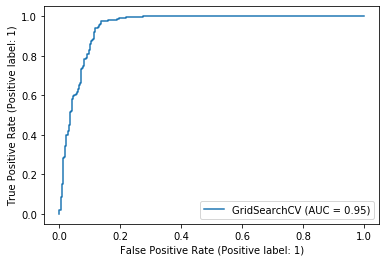

In [13]:
print('best_estimator_', grid_search.best_estimator_)
print('best_score_', grid_search.best_score_)
print('best_params_', grid_search.best_params_)
print('best_index_', grid_search.best_index_)
print('scorer_', grid_search.scorer_)
print('n_splits_', grid_search.n_splits_)
print('refit_time_', grid_search.refit_time_)
print('multimetric_', grid_search.multimetric_)
print(grid_search.cv_results_['params'][grid_search.best_index_])
plot_roc_curve(grid_search, X_test, y_test)
target_names = ['Healthy', 'Infected']
rep = classification_report(y_test, y_pred, target_names=target_names)
print(rep)

In [11]:
#SVM Radial Bias Function

#C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
C_range = [0.0001, 0.001, 0.01, 0.1, 1, 10]
gamma_range = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2]

param_dict = {"C":C_range, 'gamma': gamma_range}
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)

model = SVC(kernel='rbf')
grid_search = GridSearchCV(model, param_grid=param_dict, cv=5, scoring='accuracy', refit=True, verbose=50, n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 78 candidates, totalling 390 fits


Accuracy: 0.9123505976095617
best_estimator_ SVC(C=0.1, gamma=0.001)
best_score_ 0.8783984402815939
best_params_ {'C': 0.1, 'gamma': 0.001}
best_index_ 46
scorer_ make_scorer(accuracy_score)
n_splits_ 5
refit_time_ 15.426882266998291
multimetric_ False
{'C': 0.1, 'gamma': 0.001}
              precision    recall  f1-score   support

     Healthy       0.97      0.86      0.91       391
    Infected       0.86      0.97      0.91       362

    accuracy                           0.91       753
   macro avg       0.92      0.91      0.91       753
weighted avg       0.92      0.91      0.91       753



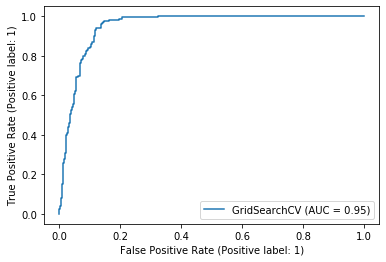

In [12]:
acc = accuracy_score(y_test, y_pred)
gamma_value = grid_search.best_params_['gamma']
C_value = grid_search.best_params_['C']
auc = roc_auc_score(y_test, grid_search.decision_function(X_test))
best_score = grid_search.best_score_

print('Accuracy:', acc)

print('best_estimator_', grid_search.best_estimator_)
print('best_score_', grid_search.best_score_)
print('best_params_', grid_search.best_params_)
print('best_index_', grid_search.best_index_)
print('scorer_', grid_search.scorer_)
print('n_splits_', grid_search.n_splits_)
print('refit_time_', grid_search.refit_time_)
print('multimetric_', grid_search.multimetric_)
print(grid_search.cv_results_['params'][grid_search.best_index_])
plot_roc_curve(grid_search, X_test, y_test)
target_names = ['Healthy', 'Infected']
rep = classification_report(y_test, y_pred, target_names=target_names)
print(rep)

Fitting 5 folds for each of 110 candidates, totalling 550 fits
Accuracy: 0.8911022576361222
best_estimator_ RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=0.01)
best_score_ 0.8670980938139191
best_params_ {'max_depth': 10, 'min_samples_leaf': 0.01}
best_index_ 99
scorer_ make_scorer(accuracy_score)
n_splits_ 5
refit_time_ 9.46454119682312
multimetric_ False
{'max_depth': 10, 'min_samples_leaf': 0.01}
              precision    recall  f1-score   support

     Healthy       0.93      0.86      0.89       391
    Infected       0.86      0.93      0.89       362

    accuracy                           0.89       753
   macro avg       0.89      0.89      0.89       753
weighted avg       0.89      0.89      0.89       753



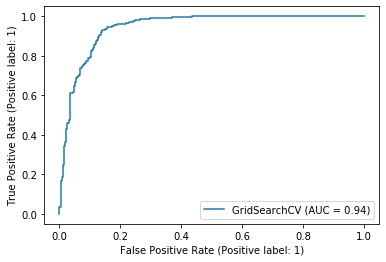

In [10]:
# Random Forest

max_depth = list(range(1,11))
min_samples_leaf = [0.01,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
param_dict = {"max_depth":max_depth, 'min_samples_leaf': min_samples_leaf}
#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10)
RFmodel = RandomForestClassifier(n_estimators=100, criterion='gini', min_samples_split=2, 
                                 max_features='sqrt', max_leaf_nodes=None)
grid_search = GridSearchCV(RFmodel, param_grid=param_dict, cv=5, refit=True, scoring='accuracy', verbose=50, n_jobs=-1)
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print('Accuracy:', acc)

print('best_estimator_', grid_search.best_estimator_)
print('best_score_', grid_search.best_score_)
print('best_params_', grid_search.best_params_)
print('best_index_', grid_search.best_index_)
print('scorer_', grid_search.scorer_)
print('n_splits_', grid_search.n_splits_)
print('refit_time_', grid_search.refit_time_)
print('multimetric_', grid_search.multimetric_)
print(grid_search.cv_results_['params'][grid_search.best_index_])
plot_roc_curve(grid_search, X_test, y_test)
target_names = ['Healthy', 'Infected']
rep = classification_report(y_test, y_pred, target_names=target_names)
print(rep)

In [10]:
#load BE removed (ber) train file 
ber_file_train = 'D:\Downloads\AI in Genomics - District 3\project\code\phyla_all_4514x1177_PMI_threshold_0_clr_limma_85p.csv'
ber_df_train = pd.read_csv(ber_file_train)

In [11]:
ber_df_train

,Unnamed: 0,D_0__Archaea;D_1__Euryarchaeota;D_2__Halobacteria;D_3__Halobacteriales;D_4__Halococcaceae;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobacterium,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobrevibacter,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanosphaera,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanomicrobia;__;__;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomassiliicoccaceae;D_5__Methanomassiliicoccus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__Candidatus Methanomethylophilus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__uncultured,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;__,...,D_0__Bacteria;__;__;__;__;__,D_0__Eukaryota;D_1__Excavata;D_2__Discoba;D_3__Discicristata;D_6__Aphagea;D_7__Distigma,D_0__Eukaryota;__;__;__;__;__,Unassigned;__;__;__;__;__,col_site,diagnosis,sample_title,stool_biopsy,studyID,uc_cd
0,1939.100003,-0.1036,-0.1597,-0.6447,-0.1676,-0.1034,-0.1066,-0.1032,-0.1038,-0.1026,...,-0.0768,-0.1021,-0.1014,-0.1027,OSCCAR,1,1939.100003,stool,GEVERSM,CD
1,1939.100009,-0.0514,-0.1075,-0.5925,-0.1154,-0.0512,-0.0544,-0.0510,-0.0516,-0.0504,...,-0.0246,-0.0499,-0.0492,-0.0505,OSCCAR,1,1939.100009,stool,GEVERSM,UC
2,1939.100015,-0.2591,-0.3152,5.8172,-0.3230,-0.2589,-0.2621,-0.2587,-0.2592,-0.2581,...,2.2526,-0.2575,-0.2568,-0.2582,OSCCAR,1,1939.100015,stool,GEVERSM,CD
3,1939.100016,-0.0527,-0.1087,-0.5938,-0.1166,-0.0524,-0.0556,-0.0523,-0.0528,-0.0517,...,-0.0259,-0.0511,-0.0504,-0.0518,OSCCAR,1,1939.100016,stool,GEVERSM,UC
4,1939.100043,-0.1084,-0.1645,-0.6495,-0.1724,-0.1082,-0.1114,-0.1081,-0.1086,-0.1075,...,-0.0816,-0.1069,-0.1062,-0.1075,OSCCAR,1,1939.100043,stool,GEVERSM,UC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4509,ERR1073293,-0.1881,-0.1749,-0.3275,-0.2214,-0.1886,-0.2322,-0.1946,-0.1882,-0.2019,...,-0.6129,-0.1886,-0.1898,-0.1949,AG,0,10317.000004737,stool,AG,Control
4510,ERR1072841,-0.1508,-0.1377,-0.2902,-0.1842,-0.1513,-0.1949,-0.1574,-0.1510,-0.1647,...,0.8106,-0.1513,-0.1525,-0.1576,AG,0,10317.000001870,stool,AG,Control
4511,ERR1078202,-0.1567,-0.1435,-0.2960,-0.1900,-0.1572,-0.2008,-0.1632,-0.1568,-0.1705,...,-0.5815,-0.1572,-0.1583,-0.1635,AG,0,10317.000013111,stool,AG,Control
4512,ERR1075749,-0.1511,-0.1379,-0.2905,-0.1844,-0.1516,-0.1952,-0.1576,-0.1512,-0.1649,...,-0.5759,-0.1516,-0.1528,-0.1579,AG,0,10317.000013005,stool,AG,Control


In [12]:
#Train data
ber_X_train = ber_df_train[ber_df_train.columns[1:-6]]
ber_X_train = ber_X_train.astype('float64')

#define y
ber_y_train = ber_df_train.diagnosis

In [14]:
print(sum(ber_y_train)/len(ber_y_train))
print(ber_X_train.shape)
print(ber_y_train.shape)

0.4798404962339389
(4514, 1177)
(4514,)


In [15]:
#load BE removed (ber) test file 
ber_file_test = 'D:\Downloads\AI in Genomics - District 3\project\code\phyla_all_753x1177_PMI_threshold_0_clr_limma_15p.csv'
ber_df_test = pd.read_csv(ber_file_test)

In [16]:
ber_df_test

,Unnamed: 0,D_0__Archaea;D_1__Euryarchaeota;D_2__Halobacteria;D_3__Halobacteriales;D_4__Halococcaceae;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobacterium,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobrevibacter,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanosphaera,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanomicrobia;__;__;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomassiliicoccaceae;D_5__Methanomassiliicoccus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__Candidatus Methanomethylophilus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__uncultured,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;__,...,D_0__Bacteria;__;__;__;__;__,D_0__Eukaryota;D_1__Excavata;D_2__Discoba;D_3__Discicristata;D_6__Aphagea;D_7__Distigma,D_0__Eukaryota;__;__;__;__;__,Unassigned;__;__;__;__;__,col_site,diagnosis,sample_title,stool_biopsy,studyID,uc_cd
0,1939.100001,-0.1477,-0.2038,-0.6888,-0.2117,-0.1475,-0.1507,-0.1473,-0.1478,-0.1467,...,-0.1209,-0.1461,-0.1454,-0.1468,OSCCAR,1,1939.100001,stool,GEVERSM,CD
1,1939.100047,-0.1181,-0.1741,-0.6591,-0.1820,-0.1178,-0.1210,-0.1177,-0.1182,-0.1171,...,-0.0912,-0.1165,-0.1158,-0.1171,OSCCAR,1,1939.100047,stool,GEVERSM,UC
2,1939.100062,-0.1687,-0.2248,-0.7098,-0.2327,-0.1685,-0.1717,-0.1684,-0.1689,-0.1678,...,-0.1419,-0.1672,-0.1665,-0.1678,OSCCAR,1,1939.100062,stool,GEVERSM,UC
3,1939.100075,-0.0967,-0.1527,-0.6378,-0.1606,-0.0964,-0.0996,-0.0963,-0.0968,-0.0957,...,-0.0699,-0.0951,-0.0944,-0.0958,OSCCAR,1,1939.100075,stool,GEVERSM,CD
4,1939.100087,-0.1373,-0.1933,-0.6784,-0.2012,-0.1370,-0.1402,-0.1369,-0.1374,-0.1363,...,-0.1104,-0.1357,-0.1350,-0.1364,OSCCAR,1,1939.100087,stool,GEVERSM,CD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,ERR1075096,-0.0713,-0.0582,-0.2107,-0.1046,-0.0718,-0.1154,-0.0778,-0.0714,-0.0851,...,-0.4961,-0.0718,-0.0730,-0.0781,AG,0,10317.000012030,stool,AG,Control
749,ERR1072766,-0.1912,-0.1781,-0.3306,-0.2245,-0.1917,-0.2353,-0.1977,-0.1913,-0.2050,...,-0.6161,-0.1917,-0.1929,-0.1980,AG,0,10317.000001574,stool,AG,Control
750,ERR1072822,-0.1178,-0.1046,-0.2572,-0.1511,-0.1183,-0.1619,-0.1243,-0.1179,-0.1316,...,1.2491,-0.1183,-0.1195,-0.1246,AG,0,10317.000001794,stool,AG,Control
751,ERR1075603,-0.2052,-0.1920,-0.3446,-0.2385,-0.2057,-0.2493,-0.2117,-0.2053,-0.2190,...,1.3159,-0.2057,-0.2069,-0.2120,AG,0,10317.000001497,stool,AG,Control


In [19]:
#Test data
ber_X_test = ber_df_test[ber_df_test.columns[1:-6]]
ber_X_test = ber_X_test.astype('float64')

#define y
ber_y_test = ber_df_test.diagnosis

In [21]:
ber_X_test

,D_0__Archaea;D_1__Euryarchaeota;D_2__Halobacteria;D_3__Halobacteriales;D_4__Halococcaceae;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobacterium,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanobrevibacter,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanobacteria;D_3__Methanobacteriales;D_4__Methanobacteriaceae;D_5__Methanosphaera,D_0__Archaea;D_1__Euryarchaeota;D_2__Methanomicrobia;__;__;__,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomassiliicoccaceae;D_5__Methanomassiliicoccus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__Candidatus Methanomethylophilus,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;D_5__uncultured,D_0__Archaea;D_1__Euryarchaeota;D_2__Thermoplasmata;D_3__Methanomassiliicoccales;D_4__Methanomethylophilaceae;__,D_0__Archaea;D_1__Thaumarchaeota;D_2__Nitrososphaeria;D_3__Nitrosopumilales;D_4__Nitrosopumilaceae;D_5__Cenarchaeum,...,D_0__Bacteria;D_1__Verrucomicrobia;D_2__Verrucomicrobiae;D_3__Verrucomicrobiales;D_4__Rubritaleaceae;D_5__Luteolibacter,D_0__Bacteria;D_1__Verrucomicrobia;D_2__Verrucomicrobiae;D_3__Verrucomicrobiales;D_4__Rubritaleaceae;__,D_0__Bacteria;D_1__Verrucomicrobia;D_2__Verrucomicrobiae;D_3__Verrucomicrobiales;D_4__Verrucomicrobiaceae;D_5__Prosthecobacter,D_0__Bacteria;D_1__Verrucomicrobia;D_2__Verrucomicrobiae;D_3__Verrucomicrobiales;D_4__Verrucomicrobiaceae;D_5__Verrucomicrobium,D_0__Bacteria;D_1__Verrucomicrobia;D_2__Verrucomicrobiae;D_3__Verrucomicrobiales;D_4__Verrucomicrobiaceae;D_5__uncultured,D_0__Bacteria;D_1__Verrucomicrobia;D_2__Verrucomicrobiae;D_3__Verrucomicrobiales;D_4__Verrucomicrobiaceae;__,D_0__Bacteria;__;__;__;__;__,D_0__Eukaryota;D_1__Excavata;D_2__Discoba;D_3__Discicristata;D_6__Aphagea;D_7__Distigma,D_0__Eukaryota;__;__;__;__;__,Unassigned;__;__;__;__;__
0,-0.1477,-0.2038,-0.6888,-0.2117,-0.1475,-0.1507,-0.1473,-0.1478,-0.1467,-0.1475,...,-0.1385,-0.1476,-0.1424,-0.1478,-0.1453,-0.1556,-0.1209,-0.1461,-0.1454,-0.1468
1,-0.1181,-0.1741,-0.6591,-0.1820,-0.1178,-0.1210,-0.1177,-0.1182,-0.1171,-0.1178,...,-0.1089,-0.1180,-0.1128,-0.1182,-0.1156,-0.1259,-0.0912,-0.1165,-0.1158,-0.1171
2,-0.1687,-0.2248,-0.7098,-0.2327,-0.1685,-0.1717,-0.1684,-0.1689,-0.1678,-0.1685,...,-0.1596,-0.1687,-0.1635,-0.1689,-0.1663,-0.1766,-0.1419,-0.1672,-0.1665,-0.1678
3,-0.0967,-0.1527,-0.6378,-0.1606,-0.0964,-0.0996,-0.0963,-0.0968,-0.0957,-0.0965,...,-0.0875,-0.0966,-0.0914,-0.0968,-0.0942,-0.1046,-0.0699,-0.0951,-0.0944,-0.0958
4,-0.1373,-0.1933,-0.6784,-0.2012,-0.1370,-0.1402,-0.1369,-0.1374,-0.1363,-0.1371,...,-0.1281,-0.1372,-0.1320,-0.1374,-0.1348,-0.1451,-0.1104,-0.1357,-0.1350,-0.1364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,-0.0713,-0.0582,-0.2107,-0.1046,-0.0718,-0.1154,-0.0778,-0.0714,-0.0851,-0.0757,...,-0.0681,-0.0712,-0.0570,-0.0714,-0.0710,-0.0527,-0.4961,-0.0718,-0.0730,-0.0781
749,-0.1912,-0.1781,-0.3306,-0.2245,-0.1917,-0.2353,-0.1977,-0.1913,-0.2050,-0.1956,...,-0.1880,-0.1911,-0.1769,-0.1913,-0.1909,-0.1726,-0.6161,-0.1917,-0.1929,-0.1980
750,-0.1178,-0.1046,-0.2572,-0.1511,-0.1183,-0.1619,-0.1243,-0.1179,-0.1316,-0.1222,...,-0.1146,-0.1177,-0.1035,-0.1179,-0.1175,-0.0992,1.2491,-0.1183,-0.1195,-0.1246
751,-0.2052,-0.1920,-0.3446,-0.2385,-0.2057,-0.2493,-0.2117,-0.2053,-0.2190,-0.2096,...,-0.2020,-0.2051,-0.1909,-0.2053,-0.2049,-0.1866,1.3159,-0.2057,-0.2069,-0.2120


In [20]:
print(sum(ber_y_test)/len(ber_y_test))
print(ber_X_test.shape)
print(ber_y_test.shape)

0.4807436918990704
(753, 1177)
(753,)


Accuracy:  0.7742363877822045
              precision    recall  f1-score   support

     Healthy       0.73      0.91      0.81       391
    Infected       0.87      0.63      0.73       362

    accuracy                           0.77       753
   macro avg       0.80      0.77      0.77       753
weighted avg       0.79      0.77      0.77       753



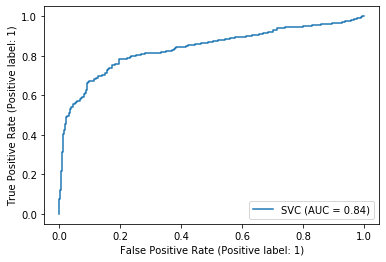

In [22]:
#SVM Linear on ber_dataset
model = SVC(C=0.0001, kernel='linear')
model.fit(ber_X_train, ber_y_train)

ber_y_pred = model.predict(ber_X_test)
acc = accuracy_score(ber_y_test, ber_y_pred)

print('Accuracy: ', acc)
plot_roc_curve(model, ber_X_test, ber_y_test)
target_names = ['Healthy', 'Infected']
rep = classification_report(ber_y_test, ber_y_pred, target_names=target_names)
print(rep)

Accuracy:  0.8791500664010624
              precision    recall  f1-score   support

     Healthy       0.87      0.91      0.89       391
    Infected       0.89      0.85      0.87       362

    accuracy                           0.88       753
   macro avg       0.88      0.88      0.88       753
weighted avg       0.88      0.88      0.88       753



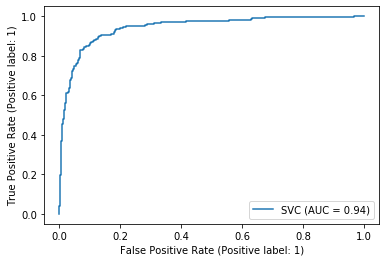

In [23]:
#SVM Radial on ber_dataset
model = SVC(C=0.1, gamma=0.001)
model.fit(ber_X_train, ber_y_train)

ber_y_pred = model.predict(ber_X_test)
acc = accuracy_score(ber_y_test, ber_y_pred)

print('Accuracy: ', acc)
plot_roc_curve(model, ber_X_test, ber_y_test)
target_names = ['Healthy', 'Infected']
rep = classification_report(ber_y_test, ber_y_pred, target_names=target_names)
print(rep)

Accuracy:  0.9216467463479415
              precision    recall  f1-score   support

     Healthy       1.00      0.85      0.92       391
    Infected       0.86      1.00      0.92       362

    accuracy                           0.92       753
   macro avg       0.93      0.92      0.92       753
weighted avg       0.93      0.92      0.92       753



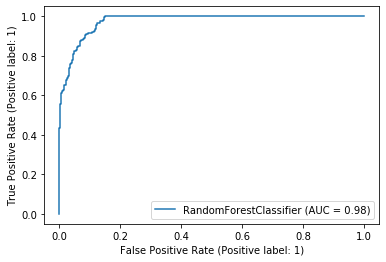

In [24]:
#Random Forest on ber_dataset
model = RandomForestClassifier(max_depth=10, min_samples_leaf=0.01, n_estimators=100, 
                                 criterion='gini', min_samples_split=2, max_features='sqrt', max_leaf_nodes=None)
model.fit(ber_X_train, ber_y_train)

ber_y_pred = model.predict(ber_X_test)
acc = accuracy_score(ber_y_test, ber_y_pred)

print('Accuracy: ', acc)
plot_roc_curve(model, ber_X_test, ber_y_test)
target_names = ['Healthy', 'Infected']
rep = classification_report(ber_y_test, ber_y_pred, target_names=target_names)
print(rep)